In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.layers import * 
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pathlib

#0s represent normal, 1 represents infected

In [2]:
# CATEGORIES = ['NORMAL', "PNEUMONIA"]
# data_dir = pathlib.Path("C:\\Users\\charm\\Documents\\GitHub\\KaggleFun\\ChestXRay\\DATA")

In [3]:
IMG_HEIGHT = 180
IMG_WIDTH = 180

In [4]:
train = tf.keras.preprocessing.image_dataset_from_directory(pathlib.Path("C:\\Users\\charm\\Documents\\GitHub\\KaggleFun\\ChestXRay\\DATA\\train"), image_size=(IMG_WIDTH, IMG_HEIGHT))
val = tf.keras.preprocessing.image_dataset_from_directory(pathlib.Path("C:\\Users\\charm\\Documents\\GitHub\\KaggleFun\\ChestXRay\\DATA\\val"), image_size=(IMG_WIDTH, IMG_HEIGHT))
test = tf.keras.preprocessing.image_dataset_from_directory(pathlib.Path("C:\\Users\\charm\\Documents\\GitHub\\KaggleFun\\ChestXRay\\DATA\\test"), image_size=(IMG_WIDTH, IMG_HEIGHT))

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [5]:
train.class_names

['NORMAL', 'PNEUMONIA']

In [6]:
train = train.map(lambda x,y: (float(x)/255, y))
val = val.map(lambda x,y: (float(x)/255, y))
test = test.map(lambda x,y: (float(x)/255, y))

In [15]:
EPOCHS = 10
BATCH_SIZE = 128
FILTERS = 64
POOL_SIZE = (2,2)
INPUT_SHAPE = (IMG_HEIGHT, IMG_WIDTH, 3)
UNITS = 128

In [16]:
def CNN():
    input = keras.layers.Input(shape=INPUT_SHAPE)
    conv1 = keras.layers.Conv2D(FILTERS, (3,3), input_shape=INPUT_SHAPE, activation='relu')(input)
    pool1 = keras.layers.MaxPool2D(pool_size=POOL_SIZE)(conv1)
    conv2 = keras.layers.Conv2D(FILTERS*2, (3,3), input_shape=INPUT_SHAPE, activation='relu')(pool1)
    pool2 = keras.layers.MaxPool2D(pool_size=POOL_SIZE)(conv2)
    conv3 = keras.layers.Conv2D(FILTERS*3, (3,3), input_shape=INPUT_SHAPE, activation='relu')(pool2)
    pool3 = keras.layers.MaxPool2D(pool_size=POOL_SIZE)(conv3)
    flatten = keras.layers.Flatten()(pool3)
    fc1 = keras.layers.Dense(units=UNITS, activation='relu')(flatten)
    d1 = keras.layers.Dropout(rate=0.1)(fc1)
    fc2 = keras.layers.Dense(units=UNITS, activation='relu')(d1)
    d2 = keras.layers.Dropout(rate=0.1)(fc2)
    output = keras.layers.Dense(1, activation='relu')(d2)

    return Model(inputs=input, outputs=output)

In [17]:
model = CNN()

In [18]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 178, 178, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 89, 89, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 87, 87, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 43, 43, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 41, 41, 192)       221376    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 20, 20, 192)      

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
history = model.fit(
  train,
  validation_data=val,
  epochs=EPOCHS
)

Epoch 1/10
163/163 [==============================] - 597s 4s/step - loss: 0.3525 - accuracy: 0.8687 - val_loss: 0.4658 - val_accuracy: 0.8125
Epoch 2/10
163/163 [==============================] - 565s 3s/step - loss: 0.2603 - accuracy: 0.9385 - val_loss: 0.4353 - val_accuracy: 0.9375
Epoch 3/10
163/163 [==============================] - 567s 3s/step - loss: 0.2269 - accuracy: 0.9626 - val_loss: 0.3683 - val_accuracy: 1.0000
Epoch 4/10
163/163 [==============================] - 603s 4s/step - loss: 0.2261 - accuracy: 0.9586 - val_loss: 0.3915 - val_accuracy: 0.9375
Epoch 5/10
163/163 [==============================] - 408s 3s/step - loss: 0.2160 - accuracy: 0.9651 - val_loss: 0.3485 - val_accuracy: 1.0000
Epoch 6/10
163/163 [==============================] - 590s 4s/step - loss: 0.2110 - accuracy: 0.9666 - val_loss: 0.4766 - val_accuracy: 0.8125
Epoch 7/10
163/163 [==============================] - 812s 5s/step - loss: 0.2107 - accuracy: 0.9676 - val_loss: 0.3524 - val_accuracy: 1.0000

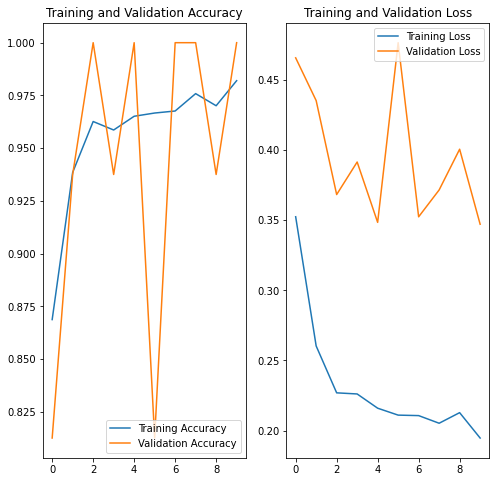

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
model.save("Models/M1.h5")

In [29]:
test_loss, test_acc = model.evaluate(test, verbose=2)

20/20 - 17s - loss: 1.8123 - accuracy: 0.7724
